# 02. 의사결정 트리 알고리즘
> 트리기반 모델인 의사결정 트리 알고리즘을 배워보고 실습을 진행해봅시다.

- toc: true 
- badges: true
- comments: true
- categories: [Day 5]
- permalink: /decision_tree
- exec: colab

<br>

### 1. 트리란?

의사결정 트리는 트리기반의 머신러닝 모델입니다. 그러나 컴퓨터 사이언스를 배우지 않은 여러분은 '트리'라는 자료구조를 잘 모르실테니 우선 '트리'에 대해 먼저 설명드리겠습니다.
<br><br>

![](https://s3.ap-northeast-2.amazonaws.com/learn.codestate.com/sos/Data+Structure/Advanced%20Data%20Structures/Untitled%204.png)

트리는 '노드'로 구성된 계층적 자료구조입니다. '노드'는 위 그림에 있는 동그라미에 해당하는데, 트리의 기본 요소를 의미합니다. 트리에는 루트(최상위 노드)가 존재하고, 루트에서부터 시작해서 자식노드들이 아래로 뻗어나가게 됩니다. 그리고 가장 마지막에 위치한 노드를 리프노트(잎사귀 노드)라고 합니다. <br><br>

각 노드는 여러개의 자식노드를 가질 수 있는데, 최대 N개까지만 가질 수 있는 트리를 N진 트리라고 합니다. 예를 들어 위 그림처럼 각 노드가 최대 2개의 자식노드를 가질 수 있으면 그런 트리를 이진트리라고 합니다. 모양이 꼭 뒤집어 놓은 나무같다고 해서 '트리'라고 부른다고 합니다.<br><br>




### 2. 의사결정 트리 알고리즘이란?

![](https://i2.wp.com/hleecaster.com/wp-content/uploads/2020/01/dct01.png?resize=1536%2C802)

의사결정 트리 알고리즘은 트리 구조를 이용한 매우 직관적인  머신러닝 모델로, 분류와 회귀가 모두 가능한 지도학습 모델입니다. 아래의 예시를 봅시다. <br><br>

![](https://github.com/gusdnd852/bigdata-lecture/blob/master/_notebooks/img/Day5/01.jpg?raw=true)

만약 여러분에게 겨울에 찍은 가족 사진을 분류해볼래? 라고 말한다면 여러분은 어떤 기준으로 이미지를 분류해내실 건가요? <br><br>

![](https://github.com/gusdnd852/bigdata-lecture/blob/master/_notebooks/img/Day5/02.jpg?raw=true)

가장 먼저 '사진'을 찾아달라고 했기 때문에, '사진'이 아닌 '그림(만화)'를 걸러낼 수 있습니다.
<br><br>

![](https://github.com/gusdnd852/bigdata-lecture/blob/master/_notebooks/img/Day5/03.jpg?raw=true)

그리고 나서 위 처럼 '겨울'사진이 아닌 사진을 걸러낼 수 있습니다.
<br><br>

![](https://github.com/gusdnd852/bigdata-lecture/blob/master/_notebooks/img/Day5/04.jpg?raw=true)

마지막으로 사진에 여러명의 사람들이 있는 저 한 장의 사진을 겨울 가족 사진일 것이라고 분류해낼 수 있습니다. 의사결정 트리는 이렇게 여러개의 질문으로 데이터를 분리해내는 방법이고, 각 질문마다 데이터가 나뉘게 됩니다. 매우 직관적이죠? 학습시에는 이런 트리구조를 생성해서 파일로 저장하고, 테스트시에는 저장된 파일을 불러와서 사용하게 됩니다.
<br><br>

### 3. ID3 알고리즘 : 의사결정 트리의 학습 알고리즘

![](https://github.com/gusdnd852/bigdata-lecture/blob/master/_notebooks/img/Day5/05.jpg?raw=true)

그렇다면 이러한 의사결정 트리는 어떻게 학습될까요? 우선 위의 예제를 그대로 사용해봅시다. 아래와 같은 학습데이터가 있습니다. 우리는 3차원 데이터를 사용하였습니다. (이미지 데이터가 아닙니다) 우선 (1. 사진인지 만화인지), (2. 겨울사진인지 아닌지), (3. 사람이 여러명인지 한명인지)의 속성을 가지고 있고, 정답열(라벨)로 우리가 찾던 겨울 가족사진인지 아닌지에 대한 여부가 기록되어있습니다.
<br><br>

![](https://github.com/gusdnd852/bigdata-lecture/blob/master/_notebooks/img/Day5/06.jpg?raw=true)

컴퓨터는 각 속성(열)을 질문처럼 만들어서 맞는 경우 오른쪽으로, 틀리는 경우 왼쪽으로 보내는 트리를 만들어냅니다. 매우 간단하죠? 그런데 속성(열)이 총 3개 있으니 질문의 순서에 따라 위 처럼 다양한 종류의 트리가 만들어질 수 있습니다. 때문에 이 질문의 순서를 정하는 일이 중요해보입니다.
<br><br>

![](https://github.com/gusdnd852/bigdata-lecture/blob/master/_notebooks/img/Day5/07.jpg?raw=true)

질문이 효율적이려면, 하나의 질문에서 많은 오답데이터를 걸러낼 수 있어야합니다. 위를 보면 (1. 사진인지 만화인지)는 총 4장의 오답을 걸러내서, 다음번부터는 4장만 확인하면 됩니다. 그에 비해 나머지 두개의 질문은 3장의 오답을 걸러내서, 다음번에 5장의 사진을 분류해야합니다. 따라서 (1. 사진인지 만화인지)가 가장 좋은 질문이라고 할 수 있습니다.
<br><br>

![](https://github.com/gusdnd852/bigdata-lecture/blob/master/_notebooks/img/Day5/08.jpg?raw=true)

그 다음에 2개의 질문 중 어떤 질문이 먼저일지 골라야합니다. (2. 겨울사진인지 아닌지)는 1장의 사진을 걸러내서 다음번에 4장의 이미지를 분류해야합니다. 그에 비해 (3. 사람이 여러명인지 한명인지)는 2장의 사진을 걸러내서 다음 번에 3장의 사진을 분류해야합니다. 따라서 (3. 사람이 여러명인지 한명인지)가 더 좋은 질문이라고 할 수 있습니다.<br><br>

![](https://github.com/gusdnd852/bigdata-lecture/blob/master/_notebooks/img/Day5/09.jpg?raw=true)

마지막으로 (2. 겨울사진인지 아닌지)를 이용해 최종적인 분류를 마치게 됩니다. 이렇게 의사결정 트리를 구현할 수 있습니다. 그렇다면 이러한 순서는 어떻게 기계적으로 구현할 수 있을까요? 우리는 여기서 정보이론 시간에 배운 엔트로피(Entropy)를 사용합니다.

<br>

### 4. ID3 알고리즘의 수학적 이해

ID3 알고리즘은 실제로 구현할 때 정보이론의 엔트로피를 계산하여 구현합니다. 엔트로피를 다시 리마인드 해봅시다. 

<br>
$$
H(x) =  \sum_{i} -P_i \cdot \log P_i
$$
<br>

엔트로피는 위의 공식으로 구할 수 있습니다. 이전에 설명했다시피, $-\log P_i$들의 기댓값을 구한 것이 엔트로피라고 설명했습니다. 그러면 예시 상황의 엔트로피를 구해봅시다.
<br><br>

![](https://github.com/gusdnd852/bigdata-lecture/blob/master/_notebooks/img/Day5/10.jpg?raw=true)

총 8장의 사진 중 겨울 가족사진(Yes)가 나올 확률은 $\frac{1}{8}$로 엔트로피는 $H(Yes) = -\frac{1}{8} \cdot \log \frac{1}{8}$입니다. 그리고 겨울 가족사진이 아닌 사진(No)가 나올 확률은 $\frac{7}{8}$로 엔트로피는 $H(Yes) = -\frac{7}{8} \cdot \log \frac{7}{8}$입니다. 따라서 $\sum Entropy = -\frac{1}{8} \cdot \log \frac{1}{8} -\frac{7}{8} \cdot \log \frac{7}{8}$로 0.543이 됩니다. 엔트로피를 구했으니, 이제 정보 획득량 (Information Gain)을 구해봅시다.
<br><br>

정보 획득량 (Information Gain)은 이전 엔트로피에서 어떠한 정보를 얻었을 때, 얼마나 엔트로피가 많이 감소하는지를 의미합니다. 수식으로 나타내면, 아래처럼 나타낼 수 있습니다.

<br>
$$
Information Gain = prev Entropy - after Entropy
$$
<br>

이전의 엔트로피는 고정 상태(0.543)에서 새롭게 데이터를 분리했을때, 엔트로피가 **더 작아질수록** 무질서도가 낮아지므로 더욱 **좋은 것**이라고 할 수 있습니다. 따라서 **새로운 엔트로피의 크기가 더 작아질수록 정보 획득량은 더 커지게 되고**, 그 말은 해당 질문으로부터 더 많은 정보를 얻었다는 것이 됩니다. 
<br><br>

새로운 엔트로피를 구할 땐, 양쪽 가지로 뻗어나가는 모든 데이터에 대해 엔트로피를 구해서 더한 것과 같습니다. 가령, 겨울사진인지 아닌지 물어봤을 때, 그렇다가 5장, 아니다가 3장이라면 5장에 대해 엔트로피를 구하고 3장에 대해 엔트로피를 구한 뒤 더해야합니다. 이를 각각 계산하여 표현하면 아래와 같습니다.
<br><br>

![](https://github.com/gusdnd852/bigdata-lecture/blob/master/_notebooks/img/Day5/11.jpg?raw=tre)

- 먼저 사진인지 만화인지 구분하는 경우, 전체에서 $\frac{4}{8}$는 만화사진이고, 나머지 $\frac{4}{8}$는 실제 사진입니다. 따라서 $\frac{4}{8}$ * 만화사진 엔트로피($- \frac{0}{4} \log \frac{0}{4} - \frac{4}{4} \log \frac{4}{4} $) + $\frac{4}{8}$ * 실제사진 엔트로피($- \frac{0}{4} \log \frac{0}{4} - \frac{4}{4} \log \frac{4}{4} $)를 구하면 0.405입니다. 따라서 정보획득량은 0.543 - 0.405 = 0.138이됩니다.
<br><br>

- 만약 겨울사진인지 아닌지로 구분하는 경우 전체에서 $\frac{5}{8}$는 겨울사진이고, 나머지 $\frac{3}{8}$는 여름사진입니다. 따라서 $\frac{5}{8}$ * 겨울사진 엔트로피($- \frac{1}{5} \log \frac{1}{5} - \frac{4}{5} \log \frac{4}{5} $) +  $\frac{3}{8}$ * 겨울이 아닌 사진 엔트로피($- \frac{0}{3} \log \frac{0}{3} - \frac{3}{3} \log \frac{3}{3} $)를 구하면 0.45입니다. 따라서 정보획득량은 0.543 - 0.45 = 0.093이 됩니다. <br><br>

- 가족사진인지 아닌지로 구분하는 경우 전체에서 $\frac{5}{8}$는 가족사진이고, 나머지 $\frac{3}{8}$는 혼자 찍은 사진입니다. 따라서 $\frac{5}{8}$ * 가족사진 엔트로피($- \frac{1}{5} \log \frac{1}{5} - \frac{4}{5} \log \frac{4}{5} $) +  $\frac{3}{8}$ * 혼자 찍은 사진 엔트로피($- \frac{0}{3} \log \frac{0}{3} - \frac{3}{3} \log \frac{3}{3} $)를 구하면 0.45입니다. 따라서 정보획득량은 0.543 - 0.45 = 0.093이 됩니다. <br><br>

따라서 사진인지 만화인지 구분하는 것이 가장 큰 정보획득량은 가진 질문이기 때문에 사진인지 만화인지를 먼저 구분해서 분리하는 것이 좋습니다. 그 이후에도 계속 이렇게 정보획득량을 계산해가면서 질문의 순서를 결정합니다. 이해가시나요?

<br>

### 5. C4.5 알고리즘 : ID3 알고리즘의 업데이트 버전

위의 경우는 범주형 속성(속성이 연속적이지 않고 이산적인 경우)에만 적용할 수 있습니다. 그러니까, 속성(열)이 Yes, No 혹은 A, B, C 처럼 구분된 경우에만 적용할 수 있습니다. 그러나 대부분의 데이터는 연속성 속성(3.45, 2.14 등)으로 구성된 경우가 많습니다. 그런 경우 어떻게 해야할까요? <br><br>

ID3 알고리즘의 개선버전인 C 4.5 알고리즘은 ID3 알고리즘의 많은 문제를 해결하려고 했습니다. 대표적으로 위에서 말한 연속형 데이터를 처리하는 문제, 가지를 너무 깊게 만드는 문제를 해결하기 위한 Pruning(가지치기)기법, 결측치 처리기법 등을 개선한 알고리즘입니다. <br><br>

#### 5.1. 연속형 데이터 처리

가령 아래와 같은 데이터가 있다고 해봅시다.

In [2]:
#collapse-hide

import pandas as pd

dataset = pd.DataFrame(
    columns=['수분함유량', '당도', '등급'],
    
    data=[
        [16.2, 34.0, 'A'],
        [18.3, 32.5, 'A'],
        [10.4, 12.2, 'B'],
        [5.2, 6.6, 'C'],
        [15.1, 36.9, 'A']
    ]
)

dataset

,수분함유량,당도,등급
0,16.2,34.0,A
1,18.3,32.5,A
2,10.4,12.2,B
3,5.2,6.6,C
4,15.1,36.9,A


이러한 데이터는 ID3 알고리즘으로는 질문 생성이 불가능합니다. 가령, "수분함유량이 5이상인가?" 혹은 "수분함유량이 10이상인가?" 라고 물을 수 있지만 **과연 어느 기점을 기준으로 물어야하는지** 알 수가 없습니다. 이전 예시에서는 A냐? B냐?, Yes냐? No냐? 라고 물을 수 있었지만 여기에서는 불가능합니다. C4.5 알고리즘은 이러한 문제를 해결합니다. <br><br>

C4.5 알고리즘은 기본적으로 이진분리 방법을 사용하는데, 하나의 수치를 가지고 그 수치보다 큰가? 작은가?로 질문을 만들어냅니다. 다만, 그 수치는 **가능한 모든 수치를 계산해봐서 가장 정보획득량 (Information Gain)이 높은 수치**를 사용합니다. 뭔가 대단한게 있을 줄 알았는데 생각보다 간단하죠? <br><br>

#### 5.2. 가지치기 기법 (Pruning)

의사결정 트리 알고리즘의 가장 큰 문제는 너무 쉽게 Overfitting 되어버린다는 문제가 있습니다. 따라서 이런 문제를 해결하기 위한 기법이 필요한데 첫번째가 가지치기 기법이고, 두번째는 다음 시간에 수업할 앙상블입니다.
<br><br>

![](https://github.com/gusdnd852/bigdata-lecture/blob/master/_notebooks/img/Day5/12.jpg?raw=tre)

가지치기 기법은 의사결정 트리 알고리즘에서 트리의 깊이가 너무 깊어지는 문제를 막기 위해 적절한 위치에서 노드를 결합하는 방식입니다. 가지치기 지점을 선정하기 위해서는 아래와 같은 함수를 이해할 수 있어야합니다.

<br>
$$
PruningCost(T) = Error(T) + \alpha \cdot Leaf(T)
$$
<br>

가지치기 지수는 해당 지점의 에러(Error) + 리프노드의 수(Leaf)로 결정되며 여기에 리프노드의 수에 대한 파라미터 $\alpha$가 붙게 됩니다. PruningCost가 최소가 되는 지점에서 가지치기가 일어나게 됩니다. 가지치기와 같은 고급 기법들도 역시 sklearn에 모두 구현되어있으니 여러분이 직접 구현할 필요는 없습니다. 이제 예제를 풀어봅시다.

<br>

### 6. 당뇨병 예측하기

당뇨병 데이터셋은 총 9개의 열이 있고 당뇨병 발병 여부가 라벨로 포함되어있습니다.
아래 주소에서 다운로드 받은 뒤, 압축을 풀고 sample_data 폴더에 넣어주세요! (그냥 드래그 하면 됩니다)
<br>

https://github.com/gusdnd852/bigdata-lecture/files/4977229/diabetes.zip

```
root경로
    |_...
    |_sample_data
        |diabetes.csv
```
<br><br>

#### 6.1. 데이터에 대한 설명
- Pregnancies : 임신 횟수
- Glucose : 2시간 동안의 경구 포도당 내성 검사에서 혈장 포도당 농도
- BloodPressure : 이완기 혈압 (mm Hg)
- SkinThickness : SkinThicknessTriceps 피부 주름 두께 (mm)
- Insulin : 2시간 혈청 인슐린 (mu U / ml)
- BMI : 체질량 지수 (체중kg / 키(m)^2)
- DiabetesPedigreeFunction : 당뇨병 혈통 기능
- Age : 나이
- Outcome : 768개 중에 268개의 결과 클래스 변수(0 또는 1)
<br>

<br>

#### 6.2. 데이터 로딩

In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


dataset = pd.read_csv("sample_data/diabetes.csv")

# 블로그에서 깨지니, colab에서 주석 풀어주세요
# dataset 

<br>

#### 6.3 결측치 확인

In [7]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [10]:
dataset.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

타이타닉 분석때는 이런 방식으로 결측치를 확인했습니다. 당뇨병 데이터는 결측치가 없어보이네요. 그러나, 정말 그럴까요?

In [16]:
dataset.describe().iloc[:, 0]
# 임신횟수

count    768.000000
mean       3.845052
std        3.369578
min        0.000000
25%        1.000000
50%        3.000000
75%        6.000000
max       17.000000
Name: Pregnancies, dtype: float64

In [17]:
dataset.describe().iloc[:, 1]
# 포도당 농도

count    768.000000
mean     120.894531
std       31.972618
min        0.000000
25%       99.000000
50%      117.000000
75%      140.250000
max      199.000000
Name: Glucose, dtype: float64

In [18]:
dataset.describe().iloc[:, 2]
# 혈압

count    768.000000
mean      69.105469
std       19.355807
min        0.000000
25%       62.000000
50%       72.000000
75%       80.000000
max      122.000000
Name: BloodPressure, dtype: float64

In [20]:
dataset.describe().iloc[:, 3]
# 피부 주름 두께

count    768.000000
mean      20.536458
std       15.952218
min        0.000000
25%        0.000000
50%       23.000000
75%       32.000000
max       99.000000
Name: SkinThickness, dtype: float64

In [21]:
dataset.describe().iloc[:, 4]
# 혈청 인슐린

count    768.000000
mean      79.799479
std      115.244002
min        0.000000
25%        0.000000
50%       30.500000
75%      127.250000
max      846.000000
Name: Insulin, dtype: float64

In [22]:
dataset.describe().iloc[:, 5]
# BMI (체질량 지수)

count    768.000000
mean      31.992578
std        7.884160
min        0.000000
25%       27.300000
50%       32.000000
75%       36.600000
max       67.100000
Name: BMI, dtype: float64

In [25]:
dataset.describe().iloc[:, 6]
# 당뇨병 혈통 기능

count    768.000000
mean       0.471876
std        0.331329
min        0.078000
25%        0.243750
50%        0.372500
75%        0.626250
max        2.420000
Name: DiabetesPedigreeFunction, dtype: float64

<br>

언뜻 보면 데이터에 결측치가 없어보이지만, 인슐린이나 혈압, 피부두께, BMI등이 0일 수는 없습니다. 따라서 이 수치들은 결측치라고 이해하고 접근하면 될 것 같습니다. 즉, 결측치는 `isnull().sum()`으로만 확인할 것이 아니라 `describe()`를 이용해서 값을 꼭 분석해보셔야합니다. 여러분이 실제로 사용할 데이터가 이런식으로 주어진다면 결측치를 꼭 제거하고 사용해야 좋은 성능을 얻을 수 있겠죠?

In [28]:
feature_columns = df.columns[:-1].tolist()
feature_columns

# 라벨을 제외한 Feature들을 데이터프레임으로 만듭니다.

['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age']

In [32]:
cols = feature_columns[1:]
cols

# 임신횟수는 실제로 값이 실제로 0이여도 상관 없기 때문에 제외합니다.

['Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age']

In [33]:
cols = df[cols].replace(0, np.nan)
cols = cols.isnull()
cols.sum()

Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
dtype: int64

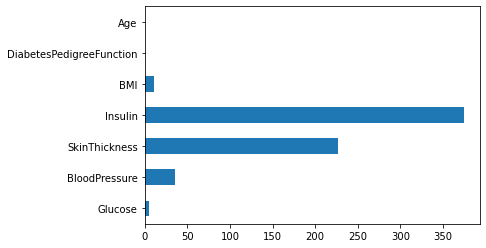

In [34]:
cols.sum().plot.barh()

Age와 DiabetesPedigreeFunction는 0인 데이터가 없고, 나머지는 0인 데이터가 많았으며, 인슐린이나 피부두께는 200 샘플 이상의 데이터가 결측치로 되어있습니다.